<a href="https://colab.research.google.com/github/shleppich/chto-to/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas natasha pymystem3 ipymarkup nltk matplotlib seaborn scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 63.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26096 sha256=f05c27f778302540c75c14b90cf8d5d797e82c95ab527c6ac84d9fa12e0e0d7e
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=f4e0d9136422ad99c4ca9111f6679496bd68d80041a27b732fd4a05f1e973a0b
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built intervaltree docopt


In [3]:
import re
import nltk
from natasha import Segmenter, MorphVocab, NewsEmbedding, NewsMorphTagger, Doc
from pymorphy2 import MorphAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [4]:
# Загружаем стоп-слова
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('russian'))
stop_symb = set(['.', ' '])

# Инициализация инструментов для нормализации текста
segmenter = Segmenter()
morph_vocab = MorphVocab()
morph_analyzer = MorphAnalyzer()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

def normalize_text(text):
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)

    normalized_tokens = []
    for token in doc.tokens:
        token.lemmatize(morph_vocab)
        if token.lemma not in stop_words and token.lemma not in stop_symb:
            normalized_tokens.append(token.lemma)
    return ' '.join(normalized_tokens)


with open('articles.json', encoding='utf-8') as file:
    file_content = file.read()
    data = json.loads(file_content)


# В список titles запишем заголовки статей
texts = []
for article in data:
    texts.append(article['title'])

print(texts)
print(f'Количество заголовков: {len(texts)}')


normalized_texts = [normalize_text(text) for text in texts]
print(normalized_texts)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['Lenta.ru', 'Бонусы за ваши реакции на Lenta.ru', 'Появились первые погибшие после минирования ВСУ берегов Тисы. Они пытались избежать тотальной мобилизации', "Бывший «ангел» Victoria's Secret опубликовала фото в бикини", 'Черчесов оценил способность Дзюбы продолжить играть в РПЛ', 'Восемь человек пострадали при атаках ВСУ на российский регион', 'Телеведущий в прямом эфире поиздевался над коллегой и возмутил зрителей', 'В Москве госпитализировали вдову режиссера Гайдая', 'Плюс-сайз-модель обвинила авиакомпании в дискриминации полных людей', 'Россиянам с печным отоплением захотели дать скидку на электричество', 'Россия рекордно нарастила прокачку газа по «Турецкому потоку»', 'В Китае заявили о поддержке своей инициативы по Украине десятками стран', 'Три страны Евросоюза нарастили поставки в Россию', 'Умерла актриса из «Великолепного века»', 'Россияне назвали самые плохие качества руководителей', '«Мы окружены НАТО»Сербия годами поддерживает Россию. Как Запад ополчился на нее за это? От

In [5]:
# Векторизация текста
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(normalized_texts)
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
# Сжатие векторов до 2 компонентов
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

In [7]:
# Кластеризация с помощью DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
clusters = dbscan.fit_predict(X_pca)

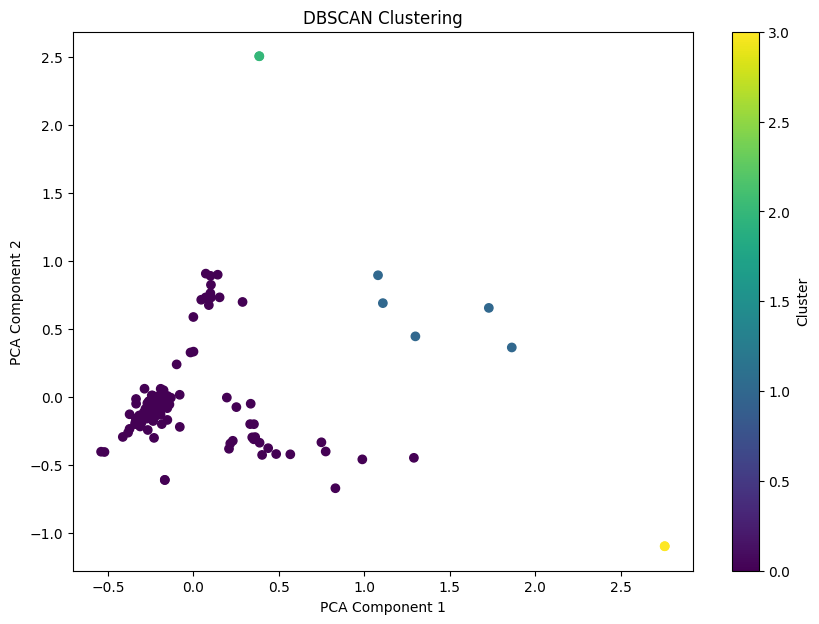

Cluster 0:
['Lenta.ru', 'Бонусы за ваши реакции на Lenta.ru', 'Появились первые погибшие после минирования ВСУ берегов Тисы. Они пытались избежать тотальной мобилизации', "Бывший «ангел» Victoria's Secret опубликовала фото в бикини", 'Черчесов оценил способность Дзюбы продолжить играть в РПЛ', 'Восемь человек пострадали при атаках ВСУ на российский регион', 'Телеведущий в прямом эфире поиздевался над коллегой и возмутил зрителей', 'В Москве госпитализировали вдову режиссера Гайдая', 'Плюс-сайз-модель обвинила авиакомпании в дискриминации полных людей', 'Россиянам с печным отоплением захотели дать скидку на электричество', 'Россия рекордно нарастила прокачку газа по «Турецкому потоку»', 'В Китае заявили о поддержке своей инициативы по Украине десятками стран', 'Три страны Евросоюза нарастили поставки в Россию', 'Умерла актриса из «Великолепного века»', 'Россияне назвали самые плохие качества руководителей', 'На Украине начнут платить за наводки на уклонистов', 'Головин оценил переход Мб

In [8]:
# Визуализация результатов
df = pd.DataFrame({'x': X_pca[:, 0], 'y': X_pca[:, 1], 'cluster': clusters})

plt.figure(figsize=(10, 7))
plt.scatter(df['x'], df['y'], c=df['cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Выделение тем по кластерам
for cluster in set(clusters):
    print(f"Cluster {cluster}:")
    cluster_texts = [texts[i] for i in range(len(clusters)) if clusters[i] == cluster]
    print(cluster_texts)